<center><img src="picture.jpg" width="600" height="500" /></center>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K 
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.layers import SimpleRNN,LSTM
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten, Reshape, concatenate, BatchNormalization

from tensorflow.keras.layers import TimeDistributed

# Load Data

In [ ]:
X=np.load('E:/Deep Course/Weeks/W8/Data/X.npy')
y=np.load('E:/Deep Course/Weeks/W8/Data/Y.npy')

print('X Shape: ', X.shape)
print('Y Shape: ', y.shape)

In [ ]:
y

# Plot Data

In [ ]:
rand_number_=np.random.randint(0,X.shape[0])
print('Sample Number: ',rand_number_)

step=X.shape[1]

plt.figure(figsize=(15,15),dpi=200)
n_row=6
n_col=5

c=0
for i in range(n_row):
    for j in range(n_col):
        
        plt.subplot(n_row,n_col,c+1)
        plt.imshow(X[rand_number_,c,:,:,0])
        plt.xticks([])
        plt.yticks([])
        plt.title(str(c+1))

        c=c+1
        
plt.show()


# Normalization

In [ ]:
X=X/255

# Shuffleing and spliting

In [ ]:
indexes = np.arange(X.shape[0])
indexes.shape
np.random.shuffle(indexes)
train_index = indexes[: int(0.9 * X.shape[0])]
val_index = indexes[int(0.9 * X.shape[0]):]
x_train = X[train_index]
x_val = X[val_index]
y_train = y[train_index]
y_val = y[val_index]

print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('x_val shape: ',x_val.shape)
print('y_val shape: ',y_val.shape)

# Model

In [ ]:
def CNN_RNN_Model(input_shape):
    
    inputs = tf.keras.Input(shape=input_shape)
    # print(inputs.shape)
    x = TimeDistributed(Conv2D(2, (3,3), activation='relu'))(inputs)
    # print(x.shape)
    x = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(x)
    # print(x.shape)
    x = TimeDistributed(Flatten())(x)
    # print(x.shape)
    x = SimpleRNN(50)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf. keras. Model(inputs=inputs, outputs=outputs)
    # Compiling the model with mean squared error loss function and rmsprop optimizer
    model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
    model.summary()

    return model
    

In [ ]:
input_shape=x_train.shape[1:]

model=CNN_RNN_Model(input_shape)


In [ ]:
history = model.fit(x_train,y_train, epochs=5, batch_size=4,validation_data=(x_val,y_val))

# Wildfire Spread Prediction in Australia

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K 
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.layers import SimpleRNN,LSTM, GRU
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten, Reshape, concatenate, BatchNormalization

from tensorflow.keras.layers import TimeDistributed

In [2]:
data_input=np.load('E:/Deep Course/Weeks/W8/Data/Input_data.npy')
data_label=np.load('E:/Deep Course/Weeks/W8/Data/Output_data.npy')
data_input.shape,data_label.shape

((18545, 64, 64, 12), (18545, 64, 64, 1))

# Plot Data

Sample Number:  8638


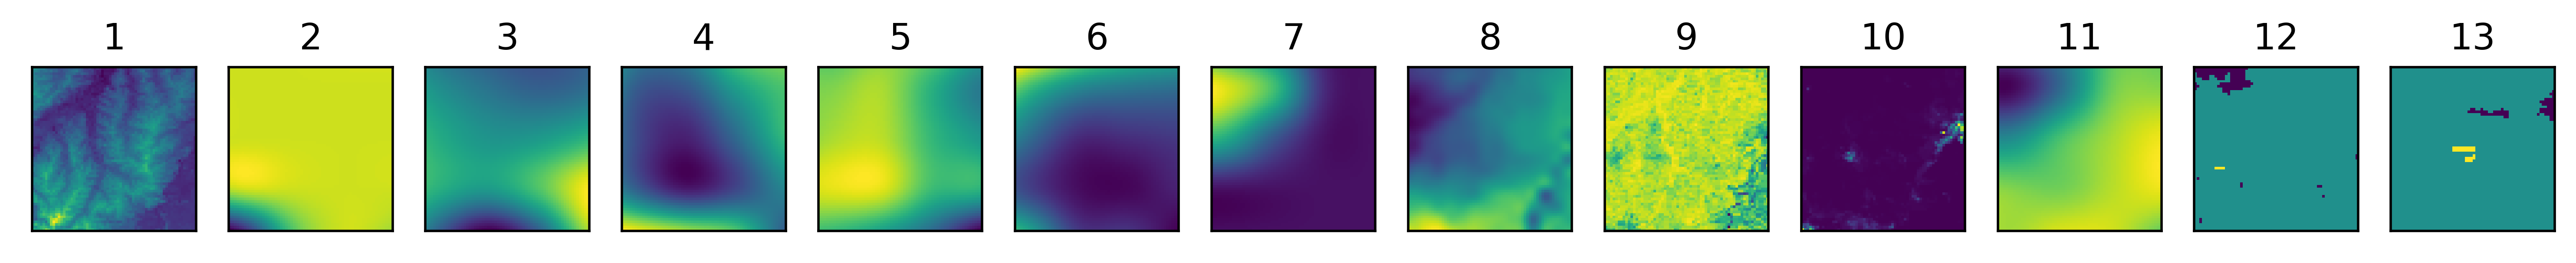

In [3]:
rand_number_ = np. random. randint(0, data_input. shape[0])  # Generate a random number within the range of indices of data_input
print('Sample Number: ', rand_number_)  # Print the randomly selected number

plt. figure(figsize=(15, 15), dpi=500)  # Create a new figure with a specified size

# Iterate over the range of 13
for i in range(13):
    
    if i == 12:  # If the current index is 12 (corresponding to the last subplot)
        plt. subplot(1, 13, i + 1)  # Create a subplot at the current position
        plt. imshow(data_label[rand_number_, :, :, 0])  # Display the image at the selected random index from data_label
        plt. xticks([])  # Remove x-axis tick labels
        plt. yticks([])  # Remove y-axis tick labels
        plt. title(str(i + 1))  # Set the title of the subplot to the current index number
        
    else:  # For all other indices
        plt. subplot(1, 13, i + 1)  # Create a subplot at the current position
        plt. imshow(data_input[rand_number_, :, :, i])  # Display the image at the selected random index from data_input
        plt. xticks([])  # Remove x-axis tick labels
        plt. yticks([])  # Remove y-axis tick labels
        plt. title(str(i + 1))  # Set the title of the subplot to the current index number

plt. show()  # Display the figure

# Remove Uncertainty values

In [4]:
x_lists = [] # Create an empty list to store valid indices

# Iterate over the range of the number of rows in data_input
for i in range(data_input. shape[0]):
    
    # Check if any element in the 11th channel of data_input or the 0th channel of data_label is equal to -1
    if np. sum(data_input[i, :, :, 11] == -1)>0 or np. sum(data_label[i, :, :, 0] == -1)>0:
        pass # If the condition is true, ignore this index
    else:
        x_lists. append(i) # If the condition is false, add the index to x_lists

print(len(x_lists)) # Print the number of valid indices in x_lists

x_lists = np. array(x_lists) # Convert x_lists to a numpy array

data_input = data_input[x_lists] # Select only the rows from data_input using the valid indices
data_label=data_label[x_lists]

data_input.shape,data_label.shape

10303


((10303, 64, 64, 12), (10303, 64, 64, 1))

# Data Preparation

In [5]:
# Define function to normalize data
def normalize(data):
    # Calculate mean of data
    data_mean = data. mean()
    # Calculate standard deviation of data
    data_std = data. std()
    # Normalize data by subtracting mean and dividing by standard deviation
    return (data - data_mean) / data_std

# Normalize each dimension of the data_input array
for i in range(11):
    # Apply the normalize function to dimension i of data_input
    data_input[:,:,:,i] = normalize(data_input[:,:,:,i])

# Set up training data
step = 1
# Create an array for training data with shape (10303, 1, 64, 64, 12) and dtype float32
trainX = np. zeros((10303, 1, 64, 64, 12), dtype='float32')
# Fill the first dimension of trainX with the values from data_input
trainX[:, 0, :, :, :] = data_input
# Assign the data_label to trainY
trainY = data_label

# Print the shape of the trainX and trainY arrays
print(trainX. shape)
print(trainY. shape)

(10303, 1, 64, 64, 12)
(10303, 64, 64, 1)


In [6]:
trainX.max()

153.84196

In [7]:
trainX.min()

-141.42365

# Model

In [8]:
 def iou(y_true, y_pred, smooth=1):
    """
    Compute the Intersection over Union (IoU) metric.
    
    Parameters:
    - y_true: the true labels
    - y_pred: the predicted labels
    - smooth: a smoothing factor to avoid division by zero
    
    Returns the IoU score.
    """
    intersection = K. sum(y_true * y_pred) # Compute the element-wise multiplication of y_true and y_pred, and then sum the result
    sum_ = K. sum(y_true + y_pred) # Compute the element-wise addition of y_true and y_pred, and then sum the result
    jac = (intersection + smooth) / (sum_ - intersection + smooth) # Compute the IoU score using the intersection and sum
    return jac

def jac_distance(y_true, y_pred):
    """
    Compute the Jaccard Distance metric.
    
    Parameters:
    - y_true: the true labels
    - y_pred: the predicted labels
    
    Returns the negative IoU value.
    """
    y_truef = K. flatten(y_true) # Flatten the y_true tensor
    y_predf = K. flatten(y_pred) # Flatten the y_pred tensor

    return -iou(y_true, y_pred) # Compute the negative IoU value using the iou function

def CNN_RNN_Model(input_shape):
    """
    Create a CNN-RNN model.
    
    Parameters:
    - input_shape: the shape of the input
    
    Returns the created model.
    """
    inputs = tf. keras. Input(shape=input_shape) # Define the input layer with the given input shape
    x = TimeDistributed(Conv2D(128, (3,3), activation='relu'))(inputs) # Apply a TimeDistributed Conv2D layer with 128 filters and a 3x3 kernel size, using relu activation function
    x = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(x) # Apply a TimeDistributed MaxPooling2D layer with a pool size of 2x2
    x = TimeDistributed(Conv2D(256, (3,3), activation='relu'))(x) # Apply a TimeDistributed Conv2D layer with 256 filters and a 3x3 kernel size, using relu activation function
    x = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(x) # Apply a TimeDistributed MaxPooling2D layer with a pool size of 2x2

    # Apply several TimeDistributed Conv2D layers with different dilation rates and concatenation
    x2 = TimeDistributed(Conv2D(64, (3,3), dilation_rate=3, activation='relu', padding='same'))(x)
    x3 = TimeDistributed(Conv2D(64, (3,3), dilation_rate=6, activation='relu', padding='same'))(x)    
    x4 = TimeDistributed(Conv2D(64, (3,3), dilation_rate=12, activation='relu', padding='same'))(x)
    x5 = TimeDistributed(Conv2D(64, (3,3), dilation_rate=18, activation='relu', padding='same'))(x)
    x6 = TimeDistributed(Conv2D(64, (3,3), dilation_rate=1, activation='relu', padding='same'))(x)
    
    x6 = concatenate([x6, x5, x2, x3, x4]) # Concatenate the feature maps


    x7 = TimeDistributed(Conv2D(32, (1,1), padding='same'))(x6) # Apply a TimeDistributed Conv2D layer with 32 filters and a 1x1 kernel size, using 'same' padding
    
    x = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(x7) # Apply a TimeDistributed MaxPooling2D layer with a pool size of 2x2
    x = TimeDistributed(Conv2D(32, (3,3), activation='relu'))(x) # Apply a TimeDistributed Conv2D layer with 32 filters and a 3x3 kernel size, using relu activation function
    x = TimeDistributed(Conv2D(32, (3,3), activation='relu'))(x) # Apply a TimeDistributed Conv2D layer with 32 filters and a 3x3 kernel size, using relu activation function
    x = TimeDistributed(BatchNormalization())(x) # Apply a TimeDistributed BatchNormalization layer

    x = TimeDistributed(Flatten())(x) # Flatten the input

    x = SimpleRNN(50, return_sequences=True)(x) # Apply an SimpleRNN layer with 50 units and return sequences
    x = SimpleRNN(50)(x) # Apply an LSTM layer with 50 units

    x = Dense(128, activation='relu')(x) # Apply a Dense layer with 128 units and relu activation function
    outputs = Dense(64*64, activation='sigmoid')(x) # Apply a Dense layer with 64x64 units and sigmoid activation function
    outputs = Reshape((64,64,1))(outputs) # Reshape the output to have a shape of (64, 64, 1)

    model = tf. keras. Model(inputs=inputs, outputs=outputs) # Define the model with the inputs and outputs

    return model

In [9]:
# Define the optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0005)
# Get the input shape from the training data
input_shape = trainX.shape[1:]
# Create a CNN_RNN_Model object with the given input shape
model = CNN_RNN_Model(input_shape)
# Compile the model with the jac_distance loss function, optimizer, and iou metric
model.compile(loss=jac_distance, optimizer=optimizer, metrics=[iou])
# Print the summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 64, 64, 1 0                                            
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, 1, 62, 62, 12 13952       input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 1, 31, 31, 12 0           time_distributed[0][0]           
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 1, 29, 29, 25 295168      time_distributed_1[0][0]         
______________________________________________________________________________________________

In [10]:
history = model.fit(trainX,trainY, epochs=20, batch_size=1,validation_split=0.05)

Epoch 1/20
9787/9787 [==============================] - ETA: 0s - loss: -0.2093 - iou: 0.2093

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.